In [1]:
import pandas as pd

df = pd.read_pickle('../log_data.pkl').reset_index(drop=True)
df

gyro                         accel                            mag  \
             x         y         z         x         y         z          x   
0     0.002951  0.001368  0.001199  0.052369 -0.005683  9.568605  20.125365   
1     0.001620 -0.001029  0.001199  0.097624  0.001749  9.581100  20.125365   
2    -0.000777  0.000569 -0.000133  0.081007 -0.008733  9.572912  19.272702   
3    -0.001044  0.001368  0.000932  0.095768  0.013093  9.612557  19.272702   
4    -0.000777  0.000302  0.000133  0.060086  0.005421  9.608648  19.272702   
...        ...       ...       ...       ...       ...       ...        ...   
2239 -0.035665  0.294852  0.039549  3.133228 -1.772255  9.455973  33.886131   
2240 -0.017822  0.332670 -0.012384  2.953147 -1.695580  9.326964  36.024447   
2241  0.001620  0.368889 -0.054995  2.788872 -1.667113  9.303817  36.024447   
2242  0.014669  0.395788 -0.094144  2.593999 -1.670234  9.093645  33.670580   
2243  0.019463  0.415229 -0.132760  2.424717 -1.614656  9.100633  33.670580   

                            
              y          z  
0     47.431219  81.644245  
1     47.431219  81.644245  
2     49.692560  80.771093  
3     49.692560  80.771093  
4     49.692560  80.771093  
...         ...        ...  
2239  50.996695  83.493879  
2240  55.334538  83.966552  
2241  55.334538  83.966552  
2242  56.571245  82.750485  
2243  56.571245  82.750485  

[2244 rows x 9 columns]

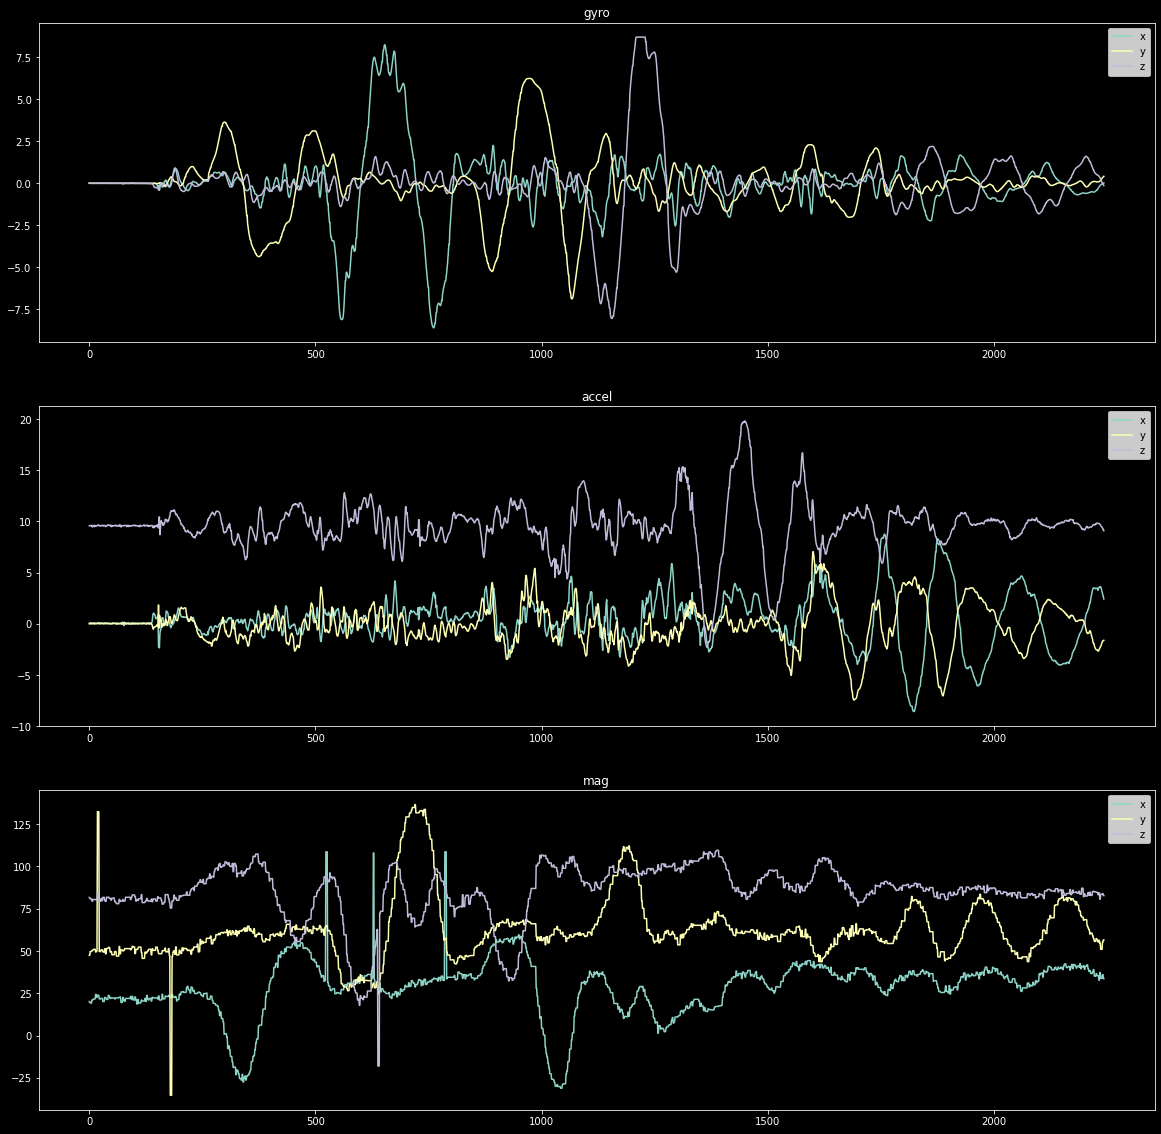

In [2]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(3, 1, figsize=(20, 20))

# set matpltoblb style to light mode
plt.style.use('default')

ax[0].plot(df['gyro'])
ax[0].set_title('gyro')
ax[0].legend(['x', 'y', 'z'])

ax[1].plot(df['accel'])
ax[1].set_title('accel')
ax[1].legend(['x', 'y', 'z'])

ax[2].plot(df['mag'])
ax[2].set_title('mag')
ax[2].legend(['x', 'y', 'z'])

plt.show()

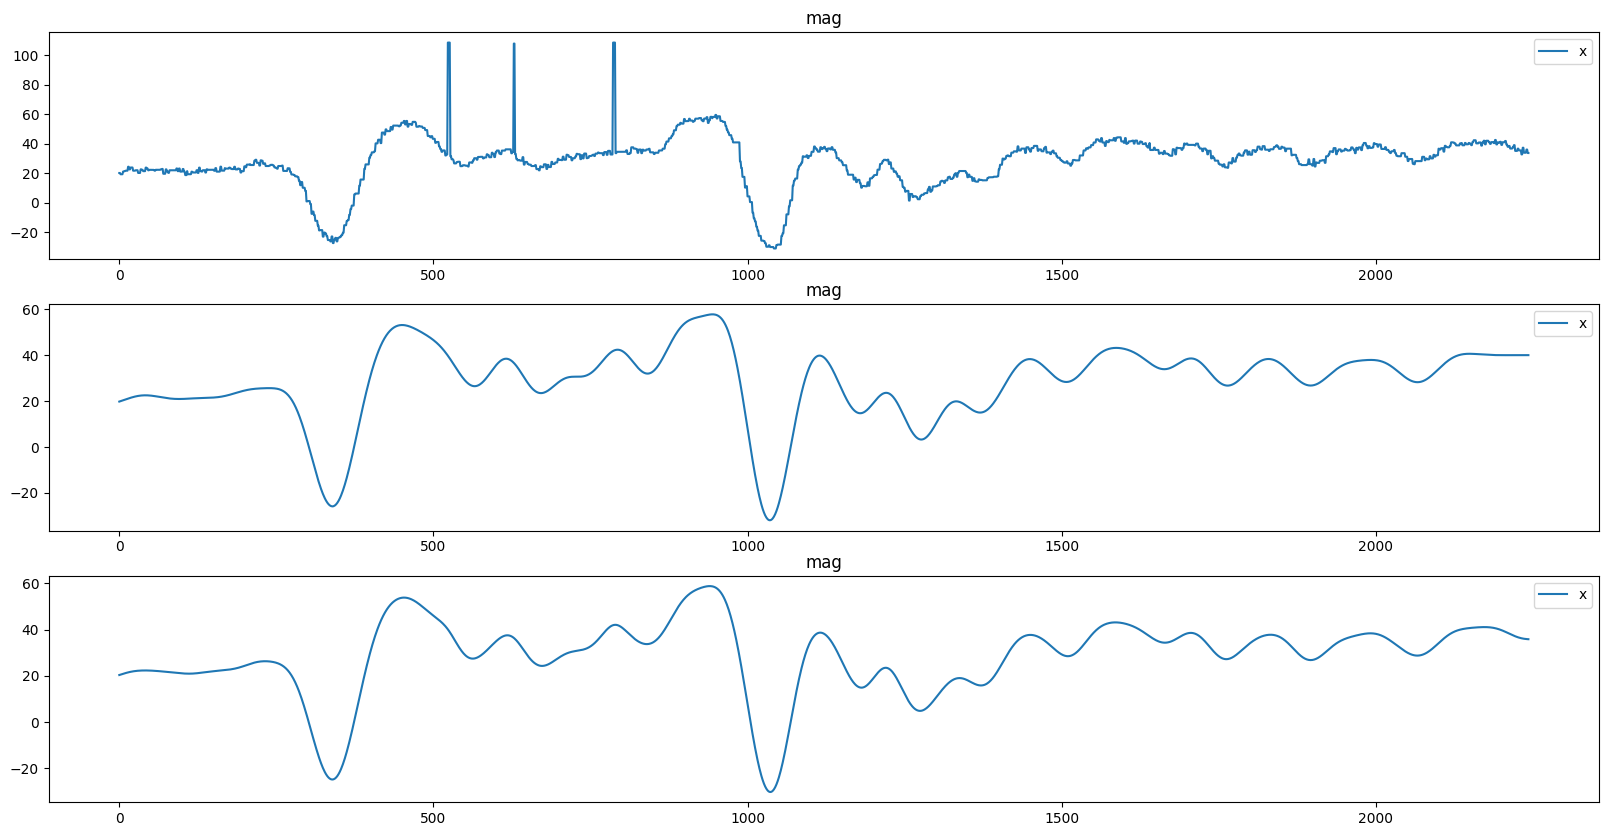

In [3]:
# low pass filter over mag Y axis
from scipy import signal

# increase plot size
_, ax = plt.subplots(3, 1, figsize=(20, 10))
ax[0].plot(df['mag']['x'])
ax[0].set_title('mag')
ax[0].legend(['x'])
b, a = signal.butter(10, 2.5, fs=200, btype='lowpass', analog=False)
ax[1].plot(signal.filtfilt(b, a, df['mag']['x'].copy()))
ax[1].set_title('mag')
ax[1].legend(['x'])
b, a = signal.butter(3, 2.5, fs=200, btype='lowpass', analog=False)
ax[2].plot(signal.filtfilt(b, a, df['mag']['x'].copy()))
ax[2].set_title('mag')
ax[2].legend(['x'])
plt.show()

In [1]:
%cd ..

c:\Users\arada\Documents\Projects\Uni\final project\MARG Dead-reckoning


In [13]:

import pandas as pd
import itertools

dt = 1
# df = pd.DataFrame({'x':[1,0]*3, 'y':[2,0]*3, 'z':[3,0]*3}, index=[0, 1, 2, 3, 4, 5])
df = pd.read_csv('true_accel.csv', index_col=0)
df.columns = tuple(itertools.product(['accel'], ['x', 'y', 'z']))

sf = df.shift(1).apply(lambda x: x * dt)
sf.columns = (('vel', 'x'), ('vel', 'y'), ('vel', 'z'))
sf = sf.cumsum()
df = pd.concat([df, sf], axis=1)
df.fillna(0, inplace=True)

sf = pd.DataFrame(0, index=df.index, columns=(('pos', 'x'), ('pos', 'y'), ('pos', 'z')))
df = pd.concat([df, sf], axis=1)
df['pos'] = df['vel'].shift(1) * dt + df['accel'].shift(1) * (dt ** 2) / 2
df.fillna(0, inplace=True)
df['pos'] = df['pos'].cumsum()

# sf = pd.DataFrame(0, index=df.index, columns=(('pos_v', 'x'), ('pos_v', 'y'), ('pos_v', 'z')))
# df = pd.concat([df, sf], axis=1)
# df['pos_v'] = df.apply(lambda x: x['accel'] * (x.name ** 2) / 2, axis=1)
df

accel                      ...            pos                             
           x         y         z  ...              x              y             z
0   0.978336 -0.144252  9.455083  ...       0.000000       0.000000  0.000000e+00
1   0.965880 -0.145304  9.456347  ...       0.489168      -0.072126  4.727541e+00
2   0.953582 -0.146314  9.457580  ...       1.950445      -0.289030  1.891080e+01
3   0.941442 -0.147281  9.458781  ...       4.371452      -0.651743  4.255102e+01
0   0.934791 -0.167077  9.398238  ...       7.739972      -1.161253  7.564942e+01
..       ...       ...       ...  ...            ...            ...           ...
3   0.196352  0.127514  9.510148  ... -128008.259975 -106375.629679  1.690898e+07
0   0.231180  0.137432  9.466411  ... -128139.638002 -106520.184539  1.692660e+07
1   0.228052  0.135031  9.466521  ... -128270.802262 -106664.606927  1.694423e+07
2   0.224963  0.132678  9.466628  ... -128401.736907 -106808.893083  1.696188e+07
3   0.221914  0.130371  9.466732  ... -128532.445044 -106953.045384  1.697953e+07

[1944 rows x 9 columns]

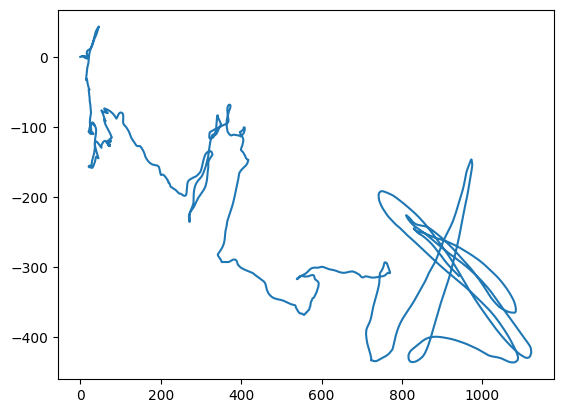

In [5]:
# draw pos for x, y, z in 3d
plt.plot(df['vel']['x'], df['vel']['y'])
plt.show()